In [1]:
# programmer - Sophia Quinton
# date - 11-14-21
# class - DSC -540
# assignment - Assignment 4

##Goal to use sinc function to run an SVM

#libraries
import numpy as np
import matplotlib.pyplot as plt

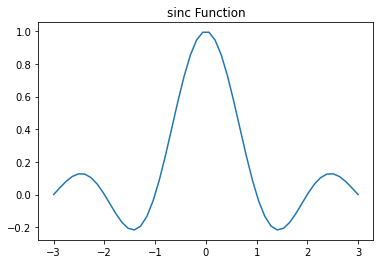

In [2]:
#generate 50 data points with Gaussian noise (Harris et. al., 2020)
numpy_list = numpy_list = np.linspace(-3, 3, 50)
sinc_list = np.sinc(numpy_list)

plt.plot(numpy_list, sinc_list)
plt.title("sinc Function")
plt.show()

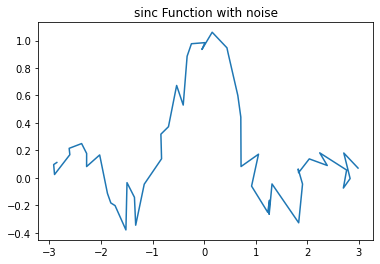

In [3]:
new_signal = sinc_list + np.random.normal(0, 0.1, 50)
new_x = numpy_list + np.random.normal(0, 0.1, 50)

plt.plot(new_x, new_signal)
plt.title("sinc Function with noise")
plt.show()


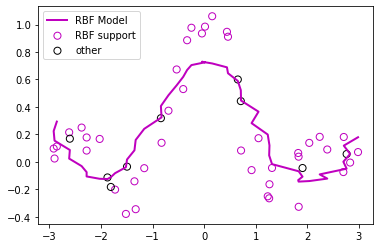

In [4]:
## train an SVM regressor with the data (Pedregosa et. al., 2011)
##using A as the test data and B as the train data

from sklearn.svm import SVR

Xtest = numpy_list.reshape(-1,1)
ytest = np.array(list(sinc_list))
y = np.array(list(new_signal))
X = new_x.reshape(-1,1)
svr_rbf = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)
train_model = svr_rbf.fit(X, y)

predictions = train_model.predict(Xtest)
X_support = []
for i in range(len(X[svr_rbf.support_])):
    X_support.append(X[svr_rbf.support_][i][0])

fig, axes = plt.subplots(nrows = 1, ncols = 1)
axes.plot(X, predictions, color = "m", lw = 2, label = "RBF Model")
axes.scatter(X_support, y[svr_rbf.support_], facecolor="none", edgecolor="m", s =50, label = "RBF support")
axes.scatter(X[np.setdiff1d(np.arange(len(X)), svr_rbf.support_)],
        y[np.setdiff1d(np.arange(len(X)), svr_rbf.support_)], facecolor="none", edgecolor="k", s=50, label = "other")
axes.legend(loc = "upper left")
plt.show()


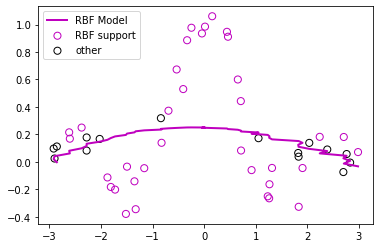

In [5]:
#try polynomial
Xtest = numpy_list.reshape(-1,1)
ytest = np.array(list(sinc_list))
y = np.array(list(new_signal))
X = new_x.reshape(-1,1)
svr_poly = SVR(kernel="poly", C=100, gamma="auto", degree=3, epsilon=0.1, coef0=1)
train_model_poly = svr_poly.fit(X, y)

predictions2 = train_model_poly.predict(Xtest)
X_support = []
for i in range(len(X[svr_poly.support_])):
    X_support.append(X[svr_poly.support_][i][0])

fig, axes = plt.subplots(nrows = 1, ncols = 1)
axes.plot(X, predictions2, color = "m", lw = 2, label = "RBF Model")
axes.scatter(X_support, y[svr_poly.support_], facecolor="none", edgecolor="m", s =50, label = "RBF support")
axes.scatter(X[np.setdiff1d(np.arange(len(X)), svr_poly.support_)],
        y[np.setdiff1d(np.arange(len(X)), svr_poly.support_)], facecolor="none", edgecolor="k", s=50, label = "other")
axes.legend(loc = "upper left")
plt.show()


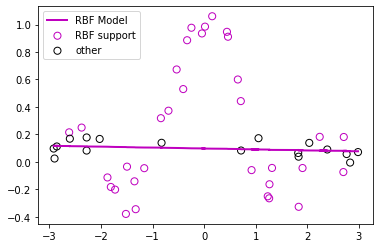

In [6]:
#try linear
Xtest = numpy_list.reshape(-1,1)
ytest = np.array(list(sinc_list))
y = np.array(list(new_signal))
X = new_x.reshape(-1,1)
svr_lin = SVR(kernel="linear", C=100, gamma="auto")
train_model_lin = svr_lin.fit(X, y)

predictions3 = train_model_lin.predict(Xtest)
X_support = []
for i in range(len(X[svr_lin.support_])):
    X_support.append(X[svr_lin.support_][i][0])

fig, axes = plt.subplots(nrows = 1, ncols = 1)
axes.plot(X, predictions3, color = "m", lw = 2, label = "RBF Model")
axes.scatter(X_support, y[svr_lin.support_], facecolor="none", edgecolor="m", s =50, label = "RBF support")
axes.scatter(X[np.setdiff1d(np.arange(len(X)), svr_lin.support_)],
        y[np.setdiff1d(np.arange(len(X)), svr_lin.support_)], facecolor="none", edgecolor="k", s=50, label = "other")
axes.legend(loc = "upper left")
plt.show()

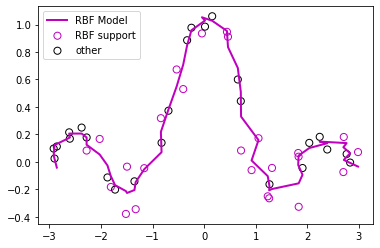

In [7]:
#try rbf with a different gamma
Xtest = numpy_list.reshape(-1,1)
ytest = np.array(list(sinc_list))
y = np.array(list(new_signal))
X = new_x.reshape(-1,1)
svr_rbf = SVR(kernel="rbf", C=50, gamma=0.5, epsilon=0.1)
train_model_rbf2 = svr_rbf.fit(X, y)

predictions4 = train_model_rbf2.predict(Xtest)
X_support = []
for i in range(len(X[svr_rbf.support_])):
    X_support.append(X[svr_rbf.support_][i][0])

fig, axes = plt.subplots(nrows = 1, ncols = 1)
axes.plot(X, predictions4, color = "m", lw = 2, label = "RBF Model")
axes.scatter(X_support, y[svr_rbf.support_], facecolor="none", edgecolor="m", s =50, label = "RBF support")
axes.scatter(X[np.setdiff1d(np.arange(len(X)), svr_rbf.support_)],
        y[np.setdiff1d(np.arange(len(X)), svr_rbf.support_)], facecolor="none", edgecolor="k", s=50, label = "other")
axes.legend(loc = "upper left")

plt.show()

In [8]:
##accuracy
from sklearn import metrics
#rbf accuracy
##MAE (Larose & Larose, 2019)
print("Model MAE: ", metrics.mean_absolute_error(y_true = ytest, y_pred = predictions))
print("base root MSE: ", np.sqrt(metrics.mean_squared_error(y_true = ytest, y_pred = predictions)))


Model MAE:  0.16734608238313764
base root MSE:  0.19043515607176734


In [9]:
#poly accuracy
##MAE (Larose & Larose, 2019)
print("Model MAE: ", metrics.mean_absolute_error(y_true = ytest, y_pred = predictions2))
print("base root MSE: ", np.sqrt(metrics.mean_squared_error(y_true = ytest, y_pred = predictions2)))


Model MAE:  0.24957056712573367
base root MSE:  0.3293772712264475


In [10]:
#lin accuracy 
##MAE (Larose & Larose, 2019)
print("Model MAE: ", metrics.mean_absolute_error(y_true = ytest, y_pred = predictions3))
print("base root MSE: ", np.sqrt(metrics.mean_squared_error(y_true = ytest, y_pred = predictions3)))


Model MAE:  0.25402825822101777
base root MSE:  0.3654184235130133


In [11]:
#rbf 2 accuracy
##MAE (Larose & Larose, 2019)
print("Model MAE: ", metrics.mean_absolute_error(y_true = ytest, y_pred = predictions4))
print("base root MSE: ", np.sqrt(metrics.mean_squared_error(y_true = ytest, y_pred = predictions4)))


Model MAE:  0.03755812423756456
base root MSE:  0.04879546398427969


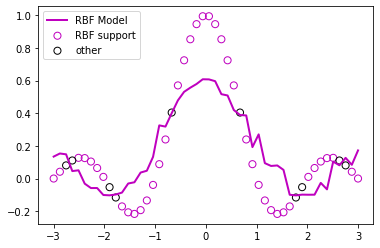

In [12]:
## train an SVM regressor with the data (Pedregosa et. al., 2011) 
##using B as the test data and a as the train data
from sklearn.svm import SVR

X = numpy_list.reshape(-1,1)
y = np.array(list(sinc_list))
ytest = np.array(list(new_signal))
Xtest = new_x.reshape(-1,1)
svr_rbf = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)
train_model = svr_rbf.fit(X, y)

predictions = train_model.predict(Xtest)
X_support = []
for i in range(len(X[svr_rbf.support_])):
    X_support.append(X[svr_rbf.support_][i][0])

fig, axes = plt.subplots(nrows = 1, ncols = 1)
axes.plot(X, predictions, color = "m", lw = 2, label = "RBF Model")
axes.scatter(X_support, y[svr_rbf.support_], facecolor="none", edgecolor="m", s =50, label = "RBF support")
axes.scatter(X[np.setdiff1d(np.arange(len(X)), svr_rbf.support_)],
        y[np.setdiff1d(np.arange(len(X)), svr_rbf.support_)], facecolor="none", edgecolor="k", s=50, label = "other")
axes.legend(loc = "upper left")

plt.show()


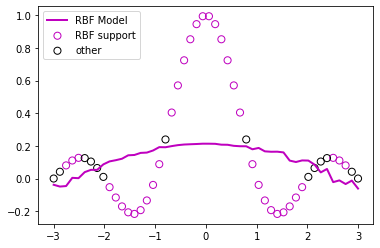

In [13]:
#try polynomial
X = numpy_list.reshape(-1,1)
y = np.array(list(sinc_list))
ytest = np.array(list(new_signal))
Xtest = new_x.reshape(-1,1)
svr_poly = SVR(kernel="poly", C=100, gamma="auto", degree=3, epsilon=0.1, coef0=1)
train_model_poly = svr_poly.fit(X, y)

predictions2 = train_model_poly.predict(Xtest)
X_support = []
for i in range(len(X[svr_poly.support_])):
    X_support.append(X[svr_poly.support_][i][0])

fig, axes = plt.subplots(nrows = 1, ncols = 1)
axes.plot(X, predictions2, color = "m", lw = 2, label = "RBF Model")
axes.scatter(X_support, y[svr_poly.support_], facecolor="none", edgecolor="m", s =50, label = "RBF support")
axes.scatter(X[np.setdiff1d(np.arange(len(X)), svr_poly.support_)],
        y[np.setdiff1d(np.arange(len(X)), svr_poly.support_)], facecolor="none", edgecolor="k", s=50, label = "other")
axes.legend(loc = "upper left")
plt.show()


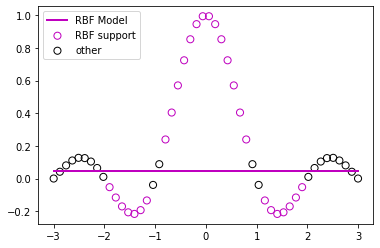

In [14]:
#try linear
X = numpy_list.reshape(-1,1)
y = np.array(list(sinc_list))
ytest = np.array(list(new_signal))
Xtest = new_x.reshape(-1,1)
svr_lin = SVR(kernel="linear", C=100, gamma="auto")
train_model_lin = svr_lin.fit(X, y)

predictions3 = train_model_lin.predict(Xtest)
X_support = []
for i in range(len(X[svr_lin.support_])):
    X_support.append(X[svr_lin.support_][i][0])

fig, axes = plt.subplots(nrows = 1, ncols = 1)
axes.plot(X, predictions3, color = "m", lw = 2, label = "RBF Model")
axes.scatter(X_support, y[svr_lin.support_], facecolor="none", edgecolor="m", s =50, label = "RBF support")
axes.scatter(X[np.setdiff1d(np.arange(len(X)), svr_lin.support_)],
        y[np.setdiff1d(np.arange(len(X)), svr_lin.support_)], facecolor="none", edgecolor="k", s=50, label = "other")
axes.legend(loc = "upper left")
plt.show()

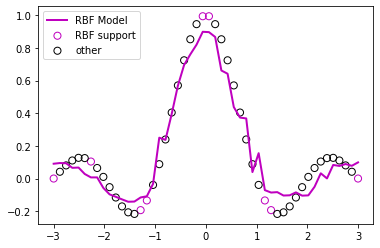

In [15]:
#try rbf with a different gamma
X = numpy_list.reshape(-1,1)
y = np.array(list(sinc_list))
ytest = np.array(list(new_signal))
Xtest = new_x.reshape(-1,1)
svr_rbf = SVR(kernel="rbf", C=100, gamma=1, epsilon=0.1)
train_model_rbf2 = svr_rbf.fit(X, y)

predictions4 = train_model_rbf2.predict(Xtest)
X_support = []
for i in range(len(X[svr_rbf.support_])):
    X_support.append(X[svr_rbf.support_][i][0])

fig, axes = plt.subplots(nrows = 1, ncols = 1)
axes.plot(X, predictions4, color = "m", lw = 2, label = "RBF Model")
axes.scatter(X_support, y[svr_rbf.support_], facecolor="none", edgecolor="m", s =50, label = "RBF support")
axes.scatter(X[np.setdiff1d(np.arange(len(X)), svr_rbf.support_)],
        y[np.setdiff1d(np.arange(len(X)), svr_rbf.support_)], facecolor="none", edgecolor="k", s=50, label = "other")
axes.legend(loc = "upper left")

plt.show()

In [16]:
##accuracy
from sklearn import metrics
#rbf accuracy
##MAE (Larose & Larose, 2019)
print("Model MAE: ", metrics.mean_absolute_error(y_true = ytest, y_pred = predictions))
print("base root MSE: ", np.sqrt(metrics.mean_squared_error(y_true = ytest, y_pred = predictions)))


Model MAE:  0.1901507860474598
base root MSE:  0.22963948377832294


In [17]:
#poly accuracy
##MAE (Larose & Larose, 2019)
print("Model MAE: ", metrics.mean_absolute_error(y_true = ytest, y_pred = predictions2))
print("base root MSE: ", np.sqrt(metrics.mean_squared_error(y_true = ytest, y_pred = predictions2)))


Model MAE:  0.2786626297582289
base root MSE:  0.36110501078686064


In [18]:
#lin accuracy 
##MAE (Larose & Larose, 2019)
print("Model MAE: ", metrics.mean_absolute_error(y_true = ytest, y_pred = predictions3))
print("base root MSE: ", np.sqrt(metrics.mean_squared_error(y_true = ytest, y_pred = predictions3)))


Model MAE:  0.28269859426399724
base root MSE:  0.40552083721667437


In [19]:
#rbf 2 accuracy
##MAE (Larose & Larose, 2019)
print("Model MAE: ", metrics.mean_absolute_error(y_true = ytest, y_pred = predictions4))
print("base root MSE: ", np.sqrt(metrics.mean_squared_error(y_true = ytest, y_pred = predictions4)))


Model MAE:  0.12448590010798019
base root MSE:  0.14649514382197168
